<a href="https://colab.research.google.com/github/deepankk2004/brain-tumor-classification-model/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download prathamgrover/brain-tumor-classification

Dataset URL: https://www.kaggle.com/datasets/prathamgrover/brain-tumor-classification
License(s): other
 98% 85.0M/86.8M [00:01<00:00, 74.8MB/s]
100% 86.8M/86.8M [00:01<00:00, 66.3MB/s]


In [ ]:
!unzip brain-tumor-classification.zip

Archive:  brain-tumor-classification.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  inflatin

In [ ]:
import torch
import os
import random
import numpy as np
from tqdm import tqdm
import json
import shutil

In [ ]:
data_path = 'Training'
category = os.listdir(data_path)
category.append('unclassify')
num = [0, 1, 2, 3, 4]
tumor_mapping = dict(zip(category, num))
del num # del in RAM

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import os
import cv2
import random
import shutil
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
train_dir = '/content/Training'
validation_dir = '/content/Testing'

In [ ]:
classes = os.listdir(train_dir)
print(classes)

['meningioma_tumor', 'no_tumor', 'glioma_tumor', 'pituitary_tumor']


In [ ]:
classes = os.listdir(validation_dir)
print(classes)

['meningioma_tumor', 'no_tumor', 'glioma_tumor', 'pituitary_tumor']


In [ ]:
X = []
y = []
image_size = 150
for i in classes:
    folderPath = os.path.join(train_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)

for i in classes:
    folderPath = os.path.join(validation_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(i)

X = np.array(X)
y = np.array(y)

100%|██████████| 74/74 [00:00<00:00, 158.80it/s]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(classes.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(classes.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale = 1./255.,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True)

img_datagen.fit(X_train)
img_datagen.fit(X_test)

In [ ]:
!pip install torch torchvision torchaudio
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_classes):
        super(Model, self).__init__()
        # Define the CNN layers
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Define the ColorClassifier layers
        self.color_classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),  # Assuming input size of 224x224
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = x.view(-1, 32 * 56 * 56)  # Flatten
        x = self.color_classifier(x)
        return x

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

In [ ]:
# Assuming you want to use MobileNet as the base model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model # Import the Keras Model class

num_classes = 10 # Replace with the actual number of classes in your problem

base_model = MobileNet(weights='imagenet', include_top=False)  #

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# Assuming you want to use MobileNet as the base model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model # Import the Keras Model class

num_classes = 4  # Set this to the actual number of classes in your dataset

base_model = MobileNet(weights='imagenet', include_top=False)  #

# Add your custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x) # Assuming you are doing classification

# Create the final model
model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_mobilenet.compile(optimizer='adam', # You can choose a different optimizer if you want
              loss='categorical_crossentropy', # Use the appropriate loss function for your problem
              metrics=['accuracy'])

# Now you can fit the model
history = model_mobilenet.fit(X_train, y_train,
                              epochs=10,
                              validation_data=(X_test, y_test),
                              verbose=1)

Epoch 1/10
82/82 [==============================] - 206s 2s/step - loss: 0.5007 - accuracy: 0.8303 - val_loss: 1.4932 - val_accuracy: 0.7136
Epoch 2/10
82/82 [==============================] - 175s 2s/step - loss: 0.1994 - accuracy: 0.9299 - val_loss: 0.3762 - val_accuracy: 0.8606
Epoch 3/10
82/82 [==============================] - 176s 2s/step - loss: 0.1360 - accuracy: 0.9510 - val_loss: 0.4841 - val_accuracy: 0.8484
Epoch 4/10
82/82 [==============================] - 173s 2s/step - loss: 0.1460 - accuracy: 0.9502 - val_loss: 0.4456 - val_accuracy: 0.8760
Epoch 5/10
82/82 [==============================] - 174s 2s/step - loss: 0.0922 - accuracy: 0.9690 - val_loss: 0.4805 - val_accuracy: 0.8790
Epoch 6/10
82/82 [==============================] - 173s 2s/step - loss: 0.0909 - accuracy: 0.9674 - val_loss: 0.8272 - val_accuracy: 0.8315
Epoch 7/10
82/82 [==============================] - 171s 2s/step - loss: 0.0690 - accuracy: 0.9770 - val_loss: 0.5885 - val_accuracy: 0.8744
Epoch 8/10
82

In [ ]:
print('Number of training examples:', len(X_train))
print('Number of validation examples:', len(X_test))
print('Accuracy', history.history['accuracy'][-1])
print('Loss', history.history['loss'][-1])


Number of training examples: 2611
Number of validation examples: 653
Accuracy 0.9774032831192017
Loss 0.060499321669340134


In [ ]:
def plot_acc_model(acc, val_acc, epochs):
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()
    plt.show()

def plot_loss_model(loss, val_loss, epochs):
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()
    plt.show()

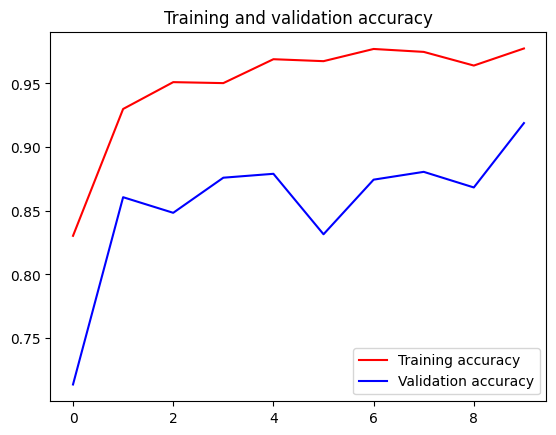

<Figure size 640x480 with 0 Axes>

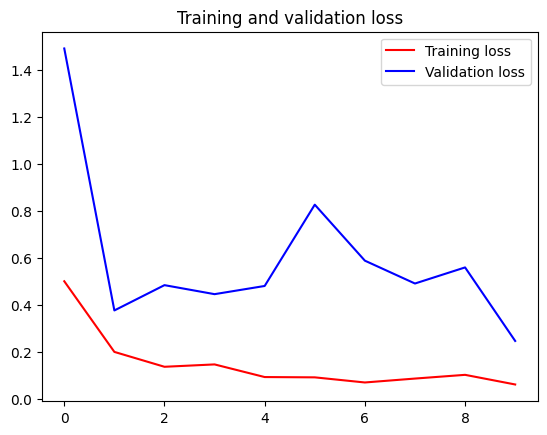

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plot_acc_model(acc, val_acc, epochs)
plot_loss_model(loss, val_loss, epochs)

In [ ]:
def create_dir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

In [ ]:
save_dir = '/kaggle/working/'
train_img_dir = os.path.join(save_dir,'img','train')
val_img_dir = os.path.join(save_dir,'img','val')
create_dir(train_img_dir)
create_dir(val_img_dir)

In [ ]:
data = [x[0] for x in os.walk(data_path)][1:]
train_labels = {}
val_labels = {}

In [ ]:
for file in data:
    shuffle_list = os.listdir(file)
    random.shuffle(shuffle_list)
    label = tumor_mapping[os.path.basename(file)]

    for idx, i in tqdm(enumerate(shuffle_list)):
        save_path = ''
        """
        80% train - 20% validation
        """
        if idx < int(len(shuffle_list) * 0.8):
            train_labels[i] = label
            save_path = train_img_dir
            with open(os.path.join(save_dir, 'train.json'), 'w') as f:
                  json.dump(train_labels, f)

        else:
            val_labels[i] = label
            save_path = val_img_dir
            with open(os.path.join(save_dir, 'val.json'), 'w') as f:
                  json.dump(val_labels, f)

        shutil.copy(os.path.join(file, i), os.path.join(save_path, i))

822it [00:01, 762.99it/s]
395it [00:00, 550.72it/s]
826it [00:02, 405.87it/s]
827it [00:02, 291.64it/s]


In [ ]:
import torch.nn as nn
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [ ]:
def save_model(model, path):
    torch.save(model.state_dict(), path)

In [ ]:
num_classes = 5  # Change this to the actual number of classes in your project
model = Model(num_classes)

In [ ]:
from torch.utils.data import Dataset, DataLoader
import cv2
from PIL import Image
from imgaug import augmenters as iaa

In [ ]:
class Generator(Dataset):
    def __init__(self, img_dir, label_dir, aug):
        self.img_dir = img_dir
        self.img_name = os.listdir(img_dir)
        with open(label_dir, 'r') as f:
            self.labels = json.load(f)
        self.aug= aug

    def __len__(self):
        return len(self.img_name)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_name[idx])
        # .convert('RGB') when you want to ensure RGB channels
        img = Image.open(img_path).convert('RGB')
        img = np.asarray(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
        img = self.aug.augment_image(img)
        try:
            label = self.labels[self.img_name[idx]]
        except:
            label = 4
        return img, label

In [ ]:
aug = iaa.SomeOf(2, [
        iaa.Fliplr(1.0),
        iaa.pillike.EnhanceColor(),
        iaa.pillike.EnhanceContrast(),
        iaa.pillike.EnhanceBrightness(),
        iaa.pillike.EnhanceSharpness()
    ])

In [ ]:
training_data = Generator('/kaggle/working/img/train', '/kaggle/working/train.json', aug)
train_dataloader= DataLoader(training_data, batch_size=32, shuffle=True)
val_data = Generator('/kaggle/working/img/val', '/kaggle/working/val.json', aug)
val_dataloader = DataLoader(val_data, batch_size=32, shuffle=True)
num_classes = 5  # Change this to the actual number of classes in your project
model = Model(num_classes)



In [ ]:
import torch.nn as nn

class CustomModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomModel, self).__init__()
        # Define the CNN layers
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Define the ColorClassifier layers
        self.color_classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),  # Assuming input size of 224x224
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = x.view(-1, 32 * 56 * 56)  # Flatten
        x = self.color_classifier(x)
        return x

num_classes = 5  # Change this to the actual number of classes in your project
model = CustomModel(num_classes)
save_model(model, '/content/md.pth')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

Classes: ['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


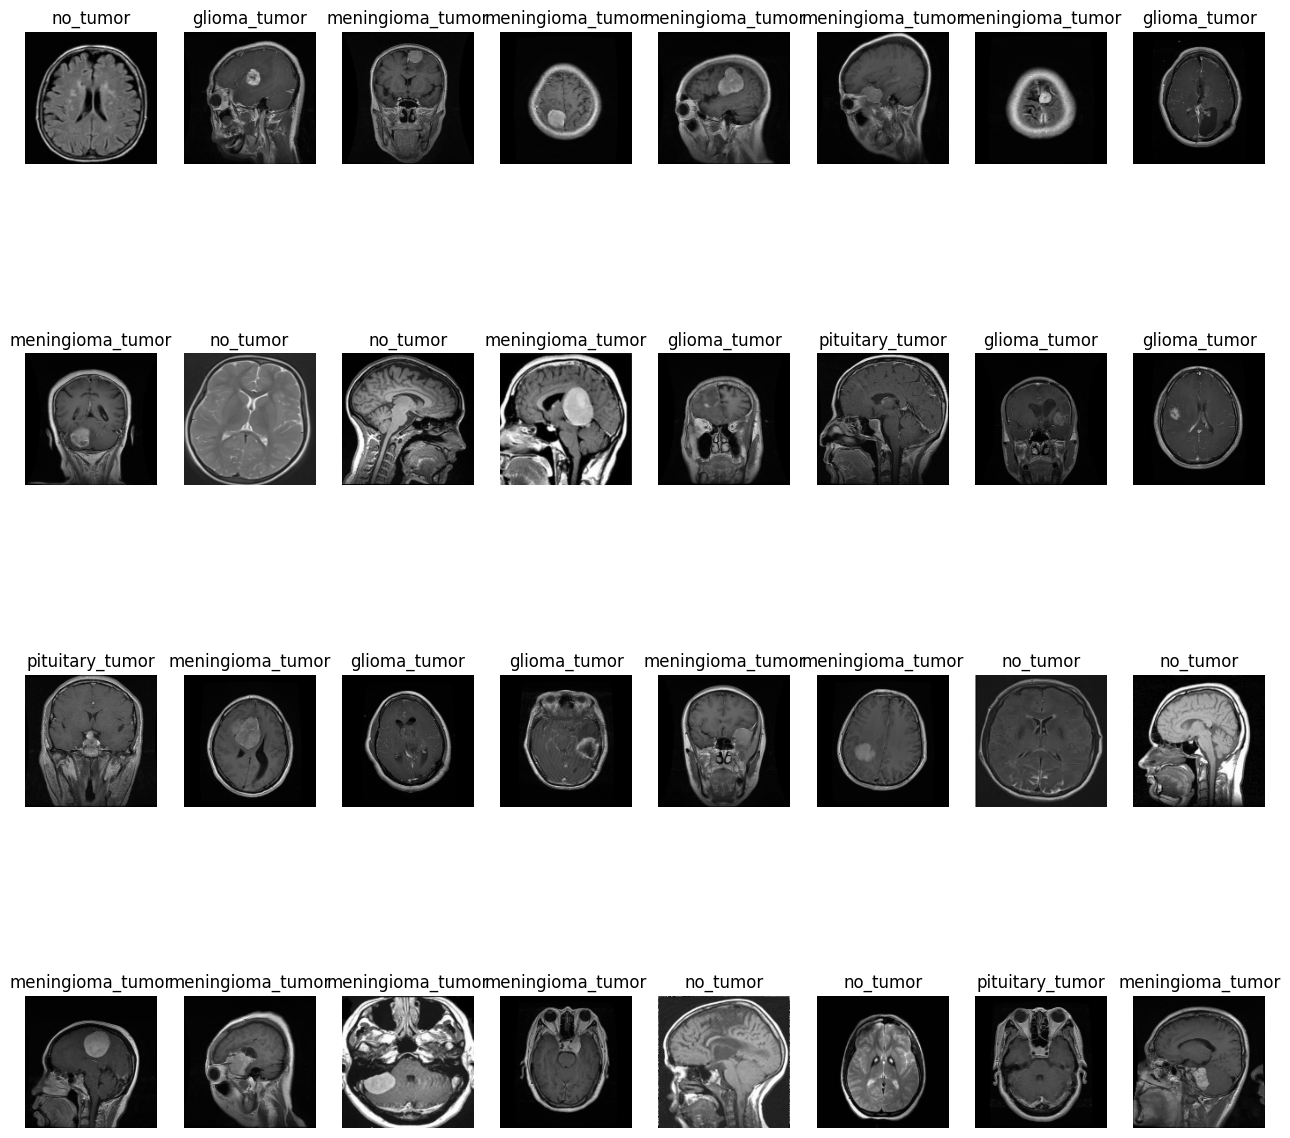

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import json
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torchvision.transforms as transforms

# Define paths and directories
train_dir = '/content/Training'
validation_dir = '/content/Testing'

# Function to load images from directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = filename
        for img_file in os.listdir(os.path.join(folder, filename)):
            img_path = os.path.join(folder, filename, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (150, 150))
            if img is not None:
                images.append(img)
                labels.append(label)
    return images, labels

# Load images and labels
X_train, y_train = load_images_from_folder(train_dir)
X_test, y_test = load_images_from_folder(validation_dir)

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Print classes
classes = np.unique(y_train)
print("Classes:", classes)

# Define custom PyTorch Dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        img = self.X[idx]
        label = self.y[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

# Define transformations for data augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Create train and validation datasets
train_dataset = CustomDataset(X_train, y_train, transform=transform)
val_dataset = CustomDataset(X_test, y_test, transform=transform)

# Create train and validation dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN model class
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(32 * 37 * 37, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

# Initialize the model
num_classes = len(classes)
model = CNNModel(num_classes)

# Plotting code
plt.figure(figsize=(16, 16))
for batch_idx, (images, labels) in enumerate(train_dataloader):
    for i in range(len(images)):
        plt.subplot(4, 8, i + 1)
        plt.imshow(np.transpose(images[i], (1, 2, 0)))
        plt.title(labels[i])
        plt.axis('off')
    plt.show()
    break  # Remove this break to visualize all batches


In [ ]:
print('Number of training examples:', len(X_train))
print('Number of validation examples:', len(X_test))
print('Accuracy', history.history['accuracy'][-1])
Accuracy=history.history['accuracy'][-1]
print('Loss', history.history['loss'][-1])

Number of training examples: 2870
Number of validation examples: 394
Accuracy 0.9774032831192017
Loss 0.060499321669340134


In [ ]:
print(f"Test Accuracy: {Accuracy * 100:.2f}%")

Test Accuracy: 97.74%
